# 1 - EDA<p>
Import libraries and first dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dc_hour = pd.read_csv('../dc-data/hour.csv')

## -> DC Dataset

In [3]:
dc_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Per the documentation, these columns have already been normalized.

In [4]:
dc_hour[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


Check the distribution in the columns.<br>
These columns should be (more or less) uniform:

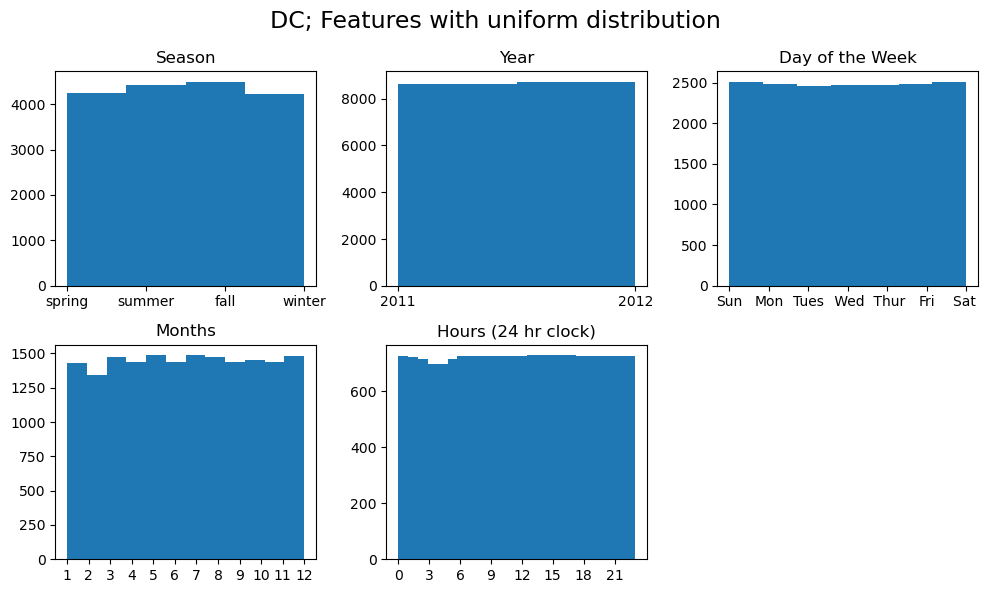

In [96]:
plt.figure(figsize=(10,6))
plt.suptitle('DC; Features with uniform distribution',fontsize=17)
plt.subplot(2,3,1)
plt.tight_layout()
plt.hist(dc_hour['season'],bins=4)
plt.title('Season')
plt.xticks(np.arange(1,5,1),labels=(['spring','summer','fall','winter']))

plt.subplot(2,3,2)
plt.tight_layout()
plt.hist(dc_hour['yr'],bins=2)
plt.title('Year')
plt.xticks(np.arange(0,2,1),labels=(['2011','2012']))

plt.subplot(2,3,3)
plt.tight_layout()
plt.hist(dc_hour['weekday'],bins=7)
plt.xticks(np.arange(0,7,1),labels=(['Sun','Mon','Tues',' Wed',' Thur','Fri','Sat ']))
plt.title('Day of the Week')

plt.subplot(2,3,4)
plt.tight_layout()
plt.hist(dc_hour['mnth'],bins=12)
plt.xticks(np.arange(1,13,1))
plt.title('Months')

plt.subplot(2,3,5)
plt.tight_layout()
plt.hist(dc_hour['hr'],bins=24)
plt.xticks(np.arange(0,24,3))
plt.title('Hours (24 hr clock)')

plt.savefig('charts/dc_uniform.png',bbox_inches='tight')

Hours should be completely uniform. Investigation shows that some dates are indeed missing some hours, and also that there are no hours that show 0 rentals. 

In [6]:
dc_hour[dc_hour['cnt']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [7]:
# missing hour 5 
dc_hour[dc_hour['dteday']=='2011-01-02'][['dteday','hr']]

,dteday,hr
24,2011-01-02,0
25,2011-01-02,1
26,2011-01-02,2
27,2011-01-02,3
28,2011-01-02,4
29,2011-01-02,6
30,2011-01-02,7
31,2011-01-02,8
32,2011-01-02,9
33,2011-01-02,10


This leads me to conclude that the missing hours are ones where no rentals occured. In order for this data to be complete, I'm going to have to fill in those missing hours. 

Categorical columns with yes/no values, unlikely to be uniformly distributed:


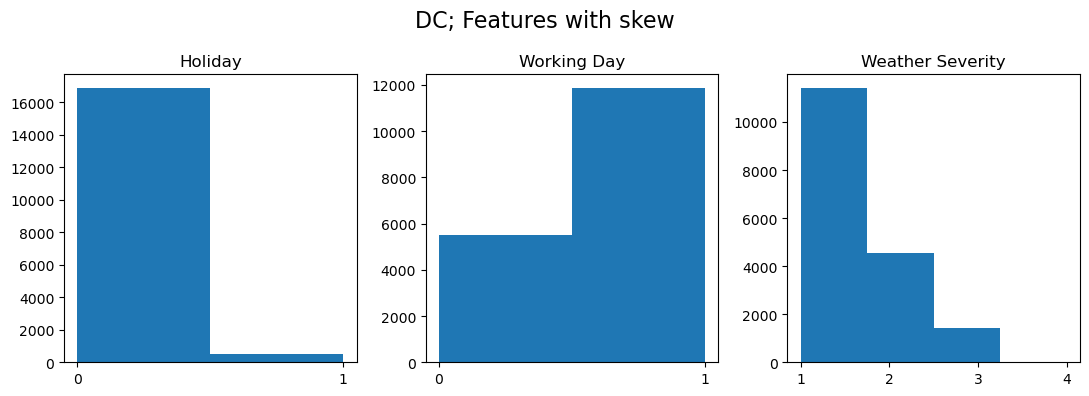

In [97]:
plt.figure(figsize=(11,4))
plt.suptitle('DC; Features with skew',fontsize=16)
plt.subplot(1,3,1)
plt.hist(dc_hour['holiday'],bins=2)
plt.tight_layout()
plt.title('Holiday')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,2)
plt.hist(dc_hour['workingday'],bins=2)
plt.tight_layout()
plt.title('Working Day')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,3)
plt.hist(dc_hour['weathersit'],bins=4)
plt.tight_layout()
plt.xticks(np.arange(1,5,1))
plt.title('Weather Severity')

plt.savefig('charts/dc_skewed.png',bbox_inches='tight')

In [9]:
dc_hour[dc_hour['weathersit']==4]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


There *are* values for weather severity 4, but very, very few. 

Columns that have already been normalized, per the documentation:

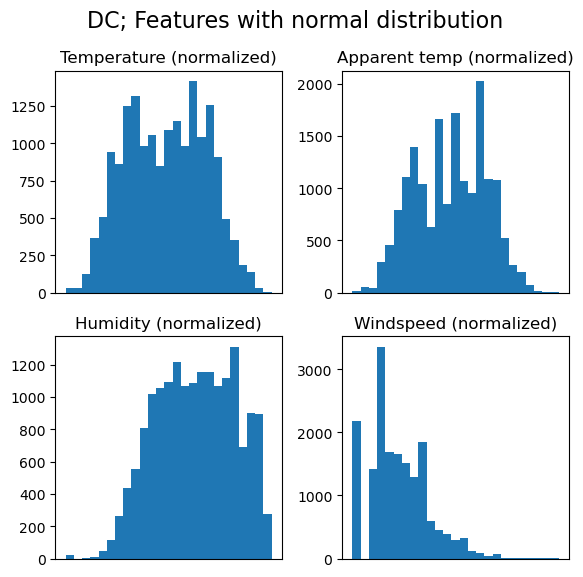

In [10]:
plt.figure(figsize=(6,6))
plt.suptitle('DC; Features with normal distribution',fontsize=16)
plt.subplot(2,2,1)
plt.tight_layout()
plt.hist(dc_hour['temp'],bins=25)
plt.xticks([])
plt.title('Temperature (normalized)')

plt.subplot(2,2,2)
plt.tight_layout()
plt.hist(dc_hour['atemp'],bins=25)
plt.xticks([])
plt.title('Apparent temp (normalized)')

plt.subplot(2,2,3)
plt.tight_layout()
plt.hist(dc_hour['hum'],bins=25)
plt.xticks([])
plt.title('Humidity (normalized)')

plt.subplot(2,2,4)
plt.tight_layout()
plt.hist(dc_hour['windspeed'],bins=25)
plt.xticks([])
plt.title('Windspeed (normalized)')

plt.savefig('charts/dc_normal.png',bbox_inches='tight')

All of these columns have approximately normal distributions.

Distribution of target variable:<br>
(I will not be using casual vs registered renters; they are redundant and don't exist in the other dataset I want to try.)

Text(0.5, 1.0, 'Bikes rented')

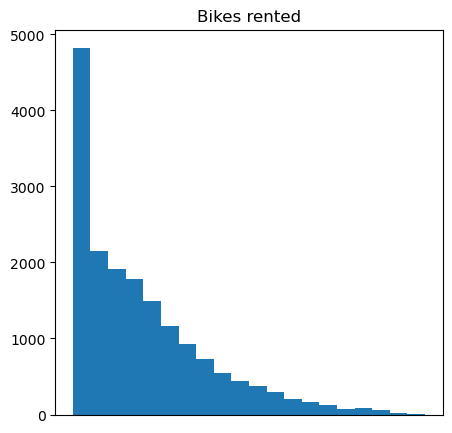

In [78]:
plt.figure(figsize=(5,5))
plt.hist(dc_hour['cnt'],bins=20)
plt.xticks([])
plt.title('Bikes rented')

The overall count is an exponential distribution.

Variable combinations that showed apparent correlation:<br>
(PairPlot not included because it was quite large and took a long time to run.)

([], [])

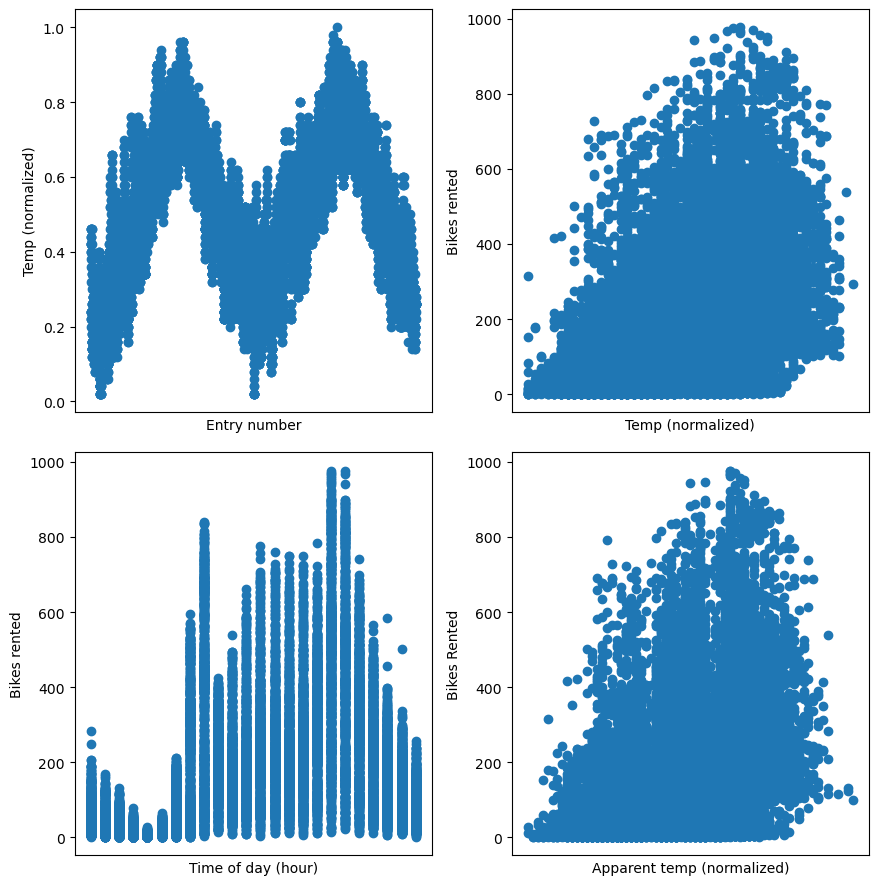

In [12]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.tight_layout()
plt.scatter(x=dc_hour['instant'],y=dc_hour['temp'])
plt.xlabel('Entry number')
plt.xticks([])
plt.ylabel('Temp (normalized)',rotation=90)

plt.subplot(2,2,2)
plt.tight_layout()
plt.scatter(x=dc_hour['temp'],y=dc_hour['cnt'])
plt.xlabel('Temp (normalized)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)

plt.subplot(2,2,3)
plt.tight_layout()
plt.scatter(x=dc_hour['hr'],y=dc_hour['cnt'])
plt.xlabel('Time of day (hour)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)

plt.subplot(2,2,4)
plt.tight_layout()
plt.scatter(x=dc_hour['atemp'],y=dc_hour['cnt'])
plt.xlabel('Apparent temp (normalized)')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])

([], [])

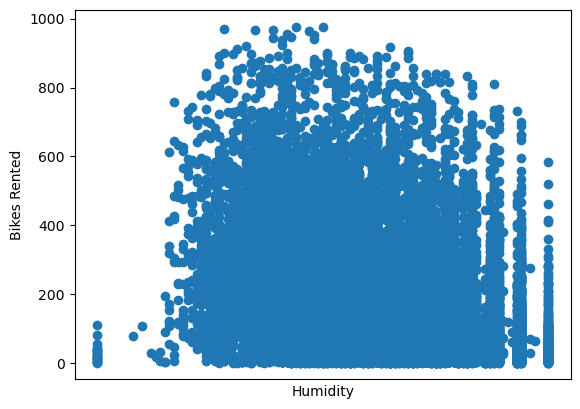

In [50]:
plt.scatter(x=dc_hour['hum'],y=dc_hour['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])

Unsurprisingly, there appears to be correlations between temperature factors and bike rentals, as well as the time of day.

In [62]:
print('Correlation coefficients:')
print('Bikes rented and Temperature:\n',np.corrcoef(dc_hour['cnt'],dc_hour['temp']))
print('Bikes rented and Hour:\n',np.corrcoef(dc_hour['cnt'],dc_hour['hr']))
print('Bikes rented and Apparent temperature:\n',np.corrcoef(dc_hour['cnt'],dc_hour['atemp']))
print('Bikes rented and Humidity: \n',np.corrcoef(dc_hour['cnt'],dc_hour['hum']))

Correlation coefficients:
Bikes rented and Temperature:
 [[1.         0.40477228]
 [0.40477228 1.        ]]
Bikes rented and Hour:
 [[1.        0.3940715]
 [0.3940715 1.       ]]
Bikes rented and Apparent temperature:
 [[1.        0.4009293]
 [0.4009293 1.       ]]
Bikes rented and Humidity: 
 [[ 1.         -0.32291074]
 [-0.32291074  1.        ]]


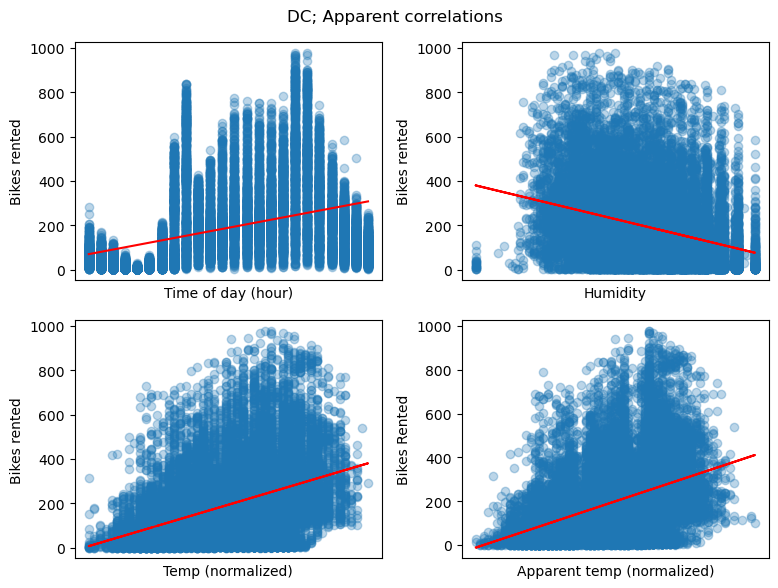

In [48]:
y = dc_hour['cnt']
a = dc_hour['temp']
aa, ay = np.polyfit(a,y,1)
b = dc_hour['hr']
bb, by = np.polyfit(b,y,1)
c = dc_hour['atemp']
cc, cy = np.polyfit(c,y,1)
h = dc_hour['hum']
hh, hy = np.polyfit(h,y,1)

plt.figure(figsize=(8,6))
plt.suptitle('DC; Apparent correlations')
# hour
plt.subplot(2,2,1)
plt.tight_layout()
plt.scatter(b,y,alpha=0.3)
plt.plot(b,bb*b+by,color='red')
plt.xlabel('Time of day (hour)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)
# hum
plt.subplot(2,2,2)
plt.tight_layout()
plt.scatter(h,y,alpha=0.3)
plt.plot(h,hh*h+hy,color='red')
plt.xlabel('Humidity')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)
# temp
plt.subplot(2,2,3)
plt.tight_layout()
plt.scatter(a,y,alpha=0.3)
plt.plot(a,aa*a+ay,color='red')
plt.xlabel('Temp (normalized)')
plt.xticks([])
plt.ylabel('Bikes rented',rotation=90)
# atemp
plt.subplot(2,2,4)
plt.tight_layout()
plt.scatter(c,y,alpha=0.3)
plt.plot(c,cc*c+cy,color='red')
plt.xlabel('Apparent temp (normalized)')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])

plt.savefig('charts/dc_app_corr.png',bbox_inches='tight')

## -> London Dataset<p>
Import second dataset

In [15]:
london = pd.read_csv('../london-data/london_merged.csv')

In [16]:
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


The columns are not identical to the other dataset, but the same data is present and can be extracted. `t1` is the same as `temp` while `t2` is the same as `atemp`. Weather is encoded differently, per the documentation, and will need to be standardized.

In [17]:
london[['t1','t2','hum','wind_speed']].describe()

,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000
mean,12.468091,11.520836,72.324954,15.913063
std,5.571818,6.615145,14.313186,7.894570
min,-1.500000,-6.000000,20.500000,0.000000
25%,8.000000,6.000000,63.000000,10.000000
50%,12.500000,12.500000,74.500000,15.000000
75%,16.000000,16.000000,83.000000,20.500000
max,34.000000,34.000000,100.000000,56.500000


In this dataset, these columns are not already normalized. 

Check the distribution in the columns.<br>
Season should still be close to uniform:

Text(0.5, 1.0, 'London; Season (Uniform distribution)')

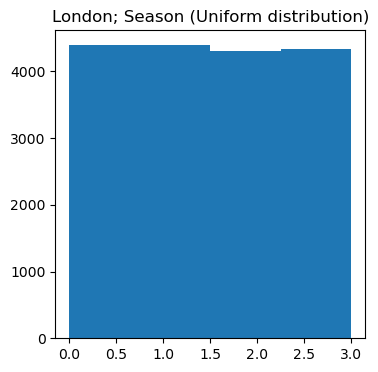

In [18]:
plt.figure(figsize=(4,4))
plt.hist(london['season'],bins=4)
plt.title('London; Season (Uniform distribution)')

Categorical columns, likely to be skewed:

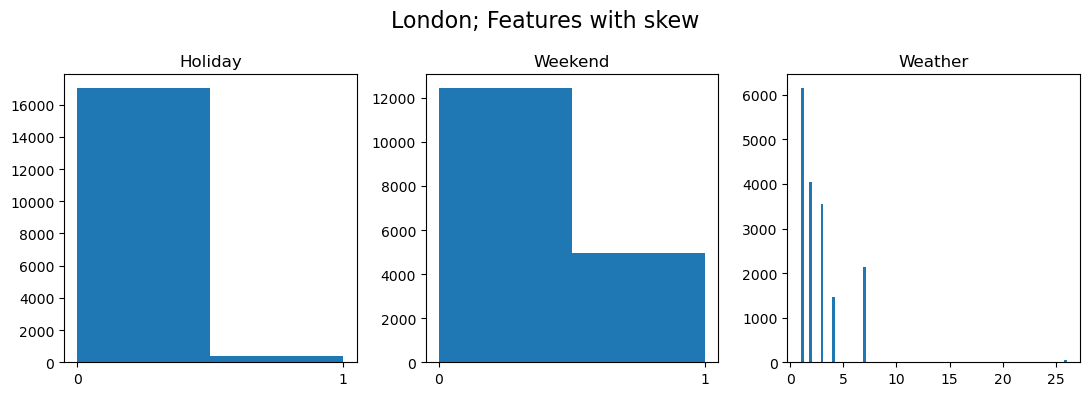

In [86]:
plt.figure(figsize=(11,4))
plt.suptitle('London; Features with skew',fontsize=16)
plt.subplot(1,3,1)
plt.hist(london['is_holiday'],bins=2)
plt.tight_layout()
plt.title('Holiday')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,2)
plt.hist(london['is_weekend'],bins=2)
plt.tight_layout()
plt.title('Weekend')
plt.xticks(np.arange(0,2,1))

plt.subplot(1,3,3)
plt.tight_layout()
plt.hist(london['weather_code'],bins=94)
plt.tight_layout()
plt.title('Weather')
plt.xticks()

plt.savefig('charts/lond_skewed.png',bbox_inches='tight')

_(Weather has to look weird because the values used to encode are 1-4, 7, 10, 26 and 94 (and 94 is never used.))_

In [20]:
london[london['weather_code']==94]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


Columns to normalize to match the other dataset:

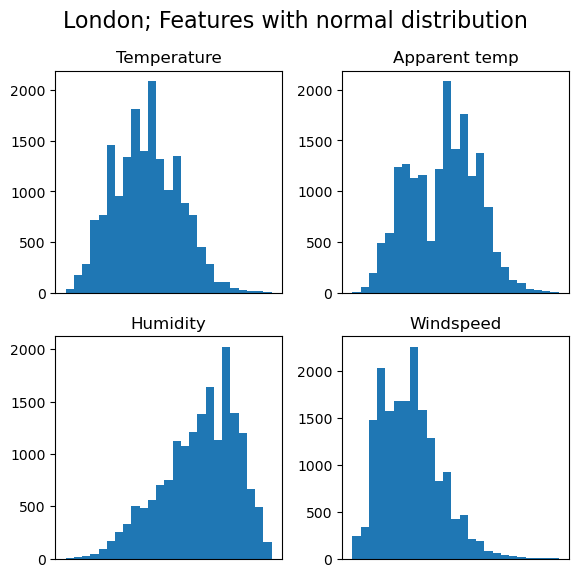

In [21]:
plt.figure(figsize=(6,6))
plt.suptitle('London; Features with normal distribution',fontsize=16)
plt.tight_layout()
plt.subplot(2,2,1)
plt.hist(london['t1'],bins=25)
plt.xticks([])
plt.title('Temperature')

plt.subplot(2,2,2)
plt.tight_layout()
plt.hist(london['t2'],bins=25)
plt.xticks([])
plt.title('Apparent temp')

plt.subplot(2,2,3)
plt.tight_layout()
plt.hist(london['hum'],bins=25)
plt.xticks([])
plt.title('Humidity')

plt.subplot(2,2,4)
plt.tight_layout()
plt.hist(london['wind_speed'],bins=25)
plt.xticks([])
plt.title('Windspeed')

plt.savefig('charts/lond_normal.png',bbox_inches='tight')

These also have fairly normal distributions. 

Distribution of the target variable:

Text(0.5, 1.0, 'Bikes rented')

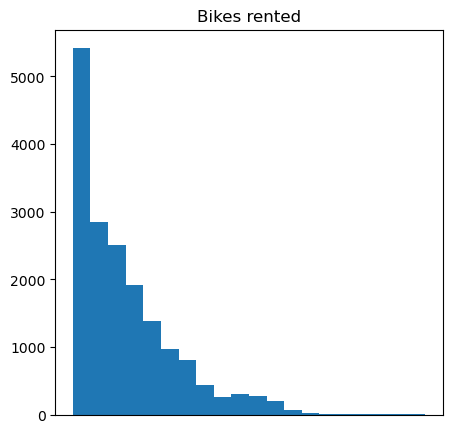

In [75]:
plt.figure(figsize=(5,5))
plt.hist(london['cnt'],bins=20)
plt.xticks([])
plt.title('Bikes rented')

Again, an exponential curve.<p>
The values in this set are much larger than in the DC set.

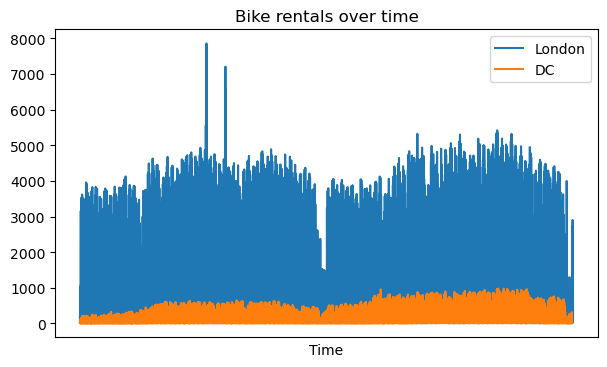

In [23]:
plt.figure(figsize=(7,4))
plt.plot(london['cnt'],label='London')
plt.plot(dc_hour['cnt'],label='DC')
plt.title('Bike rentals over time')
plt.xticks([])
plt.xlabel('Time')
plt.legend()

The same values that showed apparent correlation in the other dataset show correlation here as well. <br>
(Again, PairPlot not included due to computation time.)<p>
_(There is no equivalent column to `hour` in this dataset right now.)_

([], [])

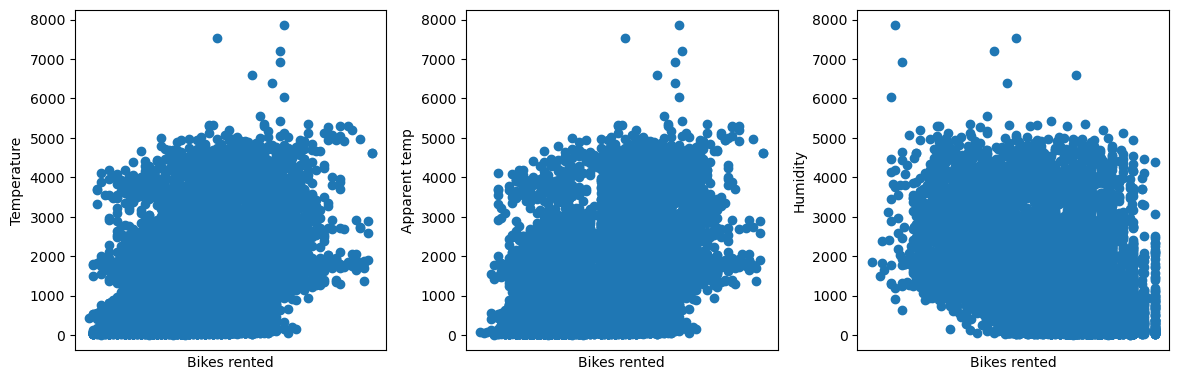

In [55]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.tight_layout()
plt.scatter(x=london['t1'],y=london['cnt'])
plt.xticks([])
plt.ylabel('Temperature',rotation=90)
plt.xlabel('Bikes rented')

plt.subplot(1,3,2)
plt.tight_layout()
plt.scatter(x=london['t2'],y=london['cnt'])
plt.xlabel('Bikes rented')
plt.ylabel('Apparent temp',rotation=90)
plt.xticks([])

plt.subplot(1,3,3)
plt.tight_layout()
plt.scatter(x=london['hum'],y=london['cnt'])
plt.xlabel('Bikes rented')
plt.ylabel('Humidity',rotation=90)
plt.xticks([])

In [64]:
print('Correlation coefficients:')
print('Bikes rented and Temperature:\n',np.corrcoef(london['cnt'],london['t1']))
print('Bikes rented and Apparent temperature:\n',np.corrcoef(london['cnt'],london['t2']))
print('Bikes rented and Humidity:\n',np.corrcoef(london['cnt'],london['hum']))

Correlation coefficients:
Bikes rented and Temperature:
 [[1.         0.38879845]
 [0.38879845 1.        ]]
Bikes rented and Apparent temperature:
 [[1.         0.36903479]
 [0.36903479 1.        ]]
Bikes rented and Humidity:
 [[ 1.         -0.46290096]
 [-0.46290096  1.        ]]


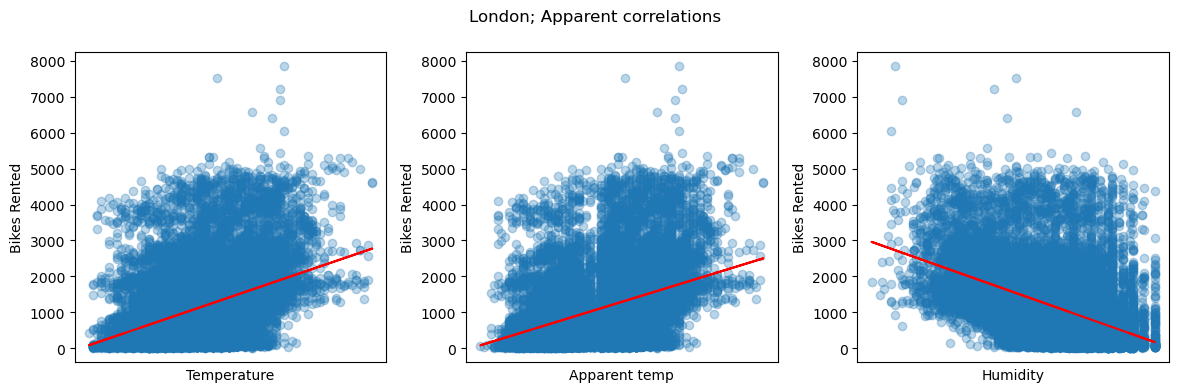

In [60]:
g = london['cnt']
d = london['t1']
dd, dg = np.polyfit(d,g,1)
e = london['t2']
ee, eg = np.polyfit(e,g,1)
p = london['hum']
pp, pg = np.polyfit(p,g,1)

plt.figure(figsize=(12,4))
plt.suptitle('London; Apparent correlations')
# t1 (temp)
plt.subplot(1,3,1)
plt.tight_layout()
plt.scatter(d,g,alpha=0.3)
plt.plot(d,dd*d+dg,color='red')
plt.xticks([])
plt.ylabel('Bikes Rented',rotation=90)
plt.xlabel('Temperature')
# t2 (apparent temp)
plt.subplot(1,3,2)
plt.tight_layout()
plt.scatter(e,g,alpha=0.3)
plt.plot(e,ee*e+eg,color='red')
plt.xlabel('Apparent temp')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])
# hum
plt.subplot(1,3,3)
plt.tight_layout()
plt.scatter(p,g,alpha=0.3)
plt.plot(p,pp*p+pg,color='red')
plt.xlabel('Humidity')
plt.ylabel('Bikes Rented',rotation=90)
plt.xticks([])

plt.savefig('charts/lond_app_corr.png',bbox_inches='tight')

Investigate later to see if there are missing hours.

In [27]:
london[london['cnt']==0]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0


In [28]:
london.shape

(17414, 10)

In [29]:
17414/24

725.5833333333334

The fact that the number of rows cannot be divided by 24 means there almost certainly are missing rows. Interestingly, unlike in the DC data, there **is** a row with a 0 in the `cnt` column. 

Saving target variable charts for the ReadMe.

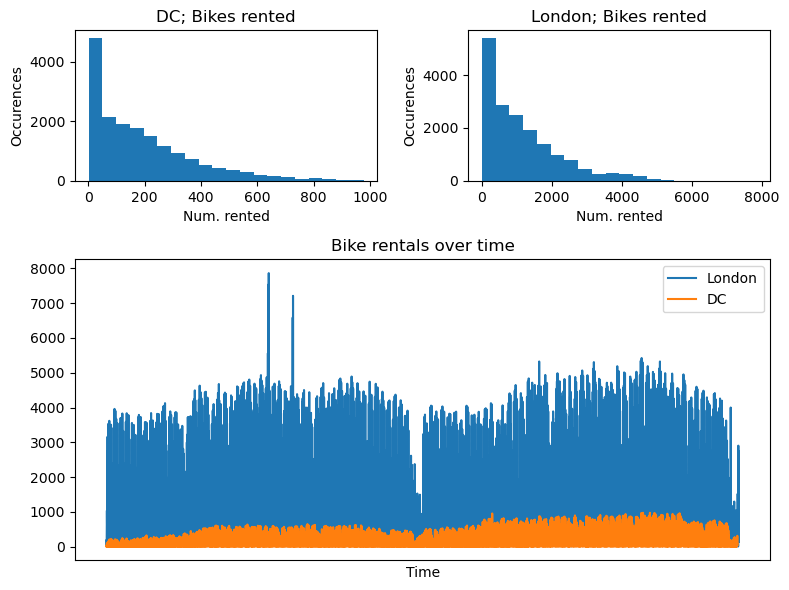

In [72]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 2])  # 1 row on top, 1 row on bottom spanning both columns

ax1 = fig.add_subplot(gs[0, 0])  # First plot in the first column
ax2 = fig.add_subplot(gs[0, 1])  # Second plot in the second column
ax3 = fig.add_subplot(gs[1, :])  # Third plot spanning the entire bottom row

# first plot
ax1.hist(dc_hour['cnt'], bins=20)
ax1.set_title('DC; Bikes rented')
ax1.set_xlabel('Num. rented')
ax1.set_ylabel('Occurences',rotation=90)

# second plot
ax2.hist(london['cnt'], bins=20)
ax2.set_title('London; Bikes rented')
ax2.set_xlabel('Num. rented')
ax2.set_ylabel('Occurences',rotation=90)

# third plot
ax3.plot(london['cnt'], label='London')
ax3.plot(dc_hour['cnt'], label='DC')
ax3.set_title('Bike rentals over time')
ax3.set_xticks([]) 
ax3.set_xlabel('Time')
ax3.legend()

plt.tight_layout()

plt.savefig('charts/target_comparison.png', bbox_inches='tight')

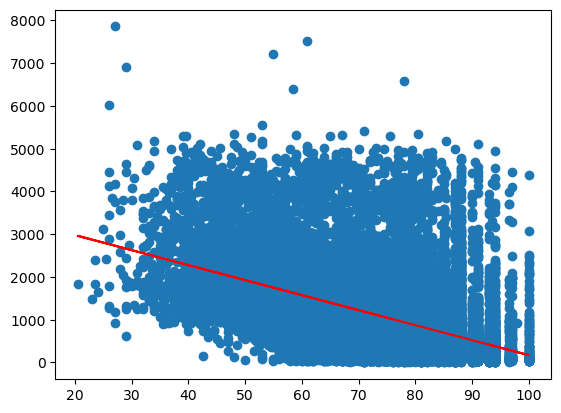

In [34]:
y = london['cnt']
a = london['hum']
aa, ay = np.polyfit(a,y,1)

plt.scatter(a,y)
plt.plot(a,aa*a+ay,color='red')